### Μηχανική Μάθηση 
#### 2η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίηση k-means, καθώς και την μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα. 

Ονοματεπώνυμο φοιτητή: Ειρήνη Δόντη

Α.Μ.: 03119839

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα [`salinas_image.npy`](https://drive.google.com/file/d/1NaVn4BpaGmyN3UJOQhTGgMlfznnKhWdD/view?usp=share_link) και τις αντίστοιχες επισημειώσεις [`salinas_labels.npy`](https://drive.google.com/file/d/1u05ZSU8ptz9ZWCi4WuenqG8KuAh981LZ/view?usp=share_link).

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [418]:
import numpy as np
from numpy import random
from PIL import Image
im = np.load('salinas_image.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά πίξελ εικόνας `salinas_labels.npy`. Οι επισημειώσεις αυτές αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές καλλιέργειες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):
```python
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]
```

In [419]:
labels = np.load('salinas_labels.npy')

In [420]:
#Match crop_type labels to image pixels
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]
pixels = []
crop_type_labels = []
rows, cols = np.shape(labels)
for row in labels:
    for pixel in row:
       #print(pixel)
        pixels.append(pixel)
        crop_type_labels.append(crop_type[pixel])
#print(crop_type_labels)

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων 

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 155ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `crop_type` που σας δόθηκε προηγουμένως.

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [421]:
#2a
h, w, c = im.shape
print("Image Height",h)
print("Image Width",w)
print("Image Channels",c)

Image Height 512
Image Width 217
Image Channels 204


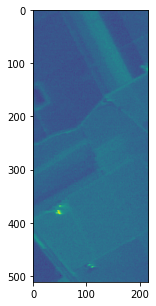

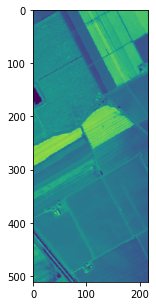

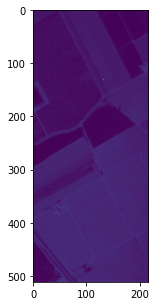

In [422]:
#2b
import matplotlib.pyplot as plt
import numpy as np
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

plt.figure(figsize=(15,5))
# 3rd Channel
plt.imshow(im[:,:,2])

plt.figure(figsize=(15,5))
# 65th Channel
plt.imshow(im[:,:,64])

plt.figure(figsize=(15,5))
#155th Channel
plt.imshow(im[:,:,154])

In [423]:
#2c
unique_words = set(crop_type_labels)
unique_word_count = len(unique_words)
print("Number of different crop categories:",unique_word_count)

Number of different crop categories: 17


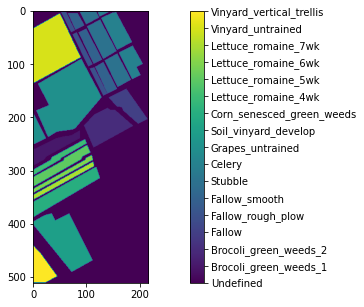

In [424]:
#2d
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
# imshow function
lab = ax.imshow(labels)

# colorbar
colorbar = fig.colorbar(lab, ax=ax, ticks=range(17))
colorbar.ax.set_yticklabels(crop_type)

plt.show()


In [425]:
#2e
result = dict((i, crop_type_labels.count(i)) for i in crop_type_labels)
print(result)

{'Undefined': 56975, 'Stubble': 3959, 'Celery': 3579, 'Fallow_rough_plow': 1394, 'Fallow_smooth': 2678, 'Vinyard_untrained': 7268, 'Grapes_untrained': 11271, 'Fallow': 1976, 'Brocoli_green_weeds_2': 3726, 'Brocoli_green_weeds_1': 2009, 'Lettuce_romaine_4wk': 1068, 'Lettuce_romaine_5wk': 1927, 'Lettuce_romaine_6wk': 916, 'Lettuce_romaine_7wk': 1070, 'Corn_senesced_green_weeds': 3278, 'Soil_vinyard_develop': 6203, 'Vinyard_vertical_trellis': 1807}


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, "διώχτε" όσα δεδομένα είναι επισημειωμένα ως `Undefined`. 

💡 Χρησιμοποιήστε την `numpy reshape` 

In [426]:
N = h*w #number of pixels
K = c   #number of channels

# Reshape image 
im = im.reshape((N,K))

# Remove undefined values from labels
reshaped_labels = []
reshaped_image = []
for i in range(labels.shape[0]):
  for j in range(labels.shape[1]):
    if(labels[i][j] != 0):
      reshaped_labels.append(labels[i][j]-1)
      reshaped_image.append(i*w+j)

# Remove undefined values from image
im = im[reshaped_image]

# Remove undefined values from crop_type_labels
crop_type_labels_no = []
for i in range(0, len(crop_type_labels)):
  if(crop_type_labels != 0):
    crop_type_labels_no.append(crop_type_labels[i])

# Remove undefined values from pixels
pixels = pixels[pixels != 0]

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [427]:
# Create dictionary for selected pixels
import random
rl = [x+1 for x in reshaped_labels]
selected_pixels = {}
for i, label in enumerate(rl):
    if label not in selected_pixels:
        pixel = im[i, :]
        # Add pixel to dictionary
        selected_pixels[label] = pixel

#Choose one pixel from each category
selected_pixels_random = {}
for label, pixels in selected_pixels.items():
    # Select random pixel
    pixel_random = random.choice(pixels)
    # Add pixel to dictionary
    selected_pixels_random[label] = pixel_random
#print(selected_pixels_random)
# sort dictionary
Dict = selected_pixels_random
Keys = list(Dict.keys())
Keys.sort()
sorted_dict = {i: Dict[i] for i in Keys}
print(sorted_dict)

{1: 372, 2: 84, 3: 2226, 4: 1778, 5: 1777, 6: 4278, 7: 1478, 8: 115, 9: 1965, 10: 917, 11: 2313, 12: 447, 13: 108, 14: 210, 15: 285, 16: 4998}


3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων πίξελ. 

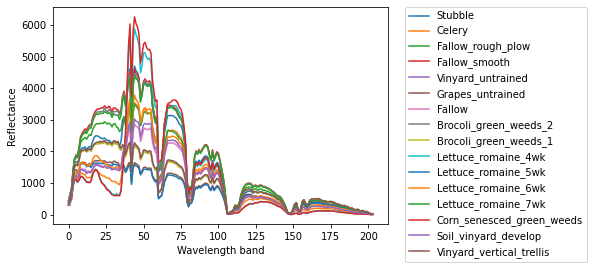

In [428]:
#1st try
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt

for label, pixel in selected_pixels_random.items():
    plt.plot(im[pixel, :], label=crop_type[label])
    #print(label, pixel, crop_type[label])

plt.xlabel('Wavelength band')
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα. 

{1: 1347, 2: 3948, 3: 2257, 4: 647, 5: 544, 6: 2538, 7: 4845, 8: 42, 9: 859, 10: 908, 11: 2198, 12: 941, 13: 1459, 14: 357, 15: 43, 16: 1157}


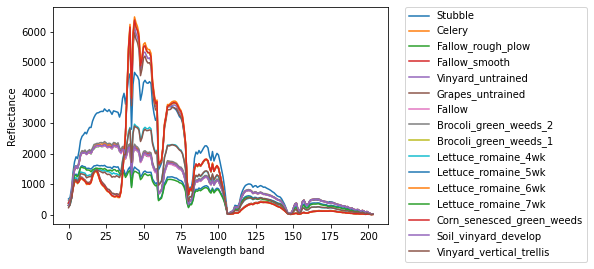

In [429]:
# 2nd try
#Choose one pixel from each category
selected_pixels_random = {}
for label, pixels in selected_pixels.items():
    # Select random pixel
    pixel_random = random.choice(pixels)
    # Add pixel to dictionary
    selected_pixels_random[label] = pixel_random
#print(selected_pixels_random)
# sort dictionary
Dict = selected_pixels_random
Keys = list(Dict.keys())
Keys.sort()
sorted_dict = {i: Dict[i] for i in Keys}
print(sorted_dict)

import matplotlib.pyplot as plt

for label, pixel in selected_pixels_random.items():
    plt.plot(im[pixel, :], label=crop_type[label])

plt.xlabel('Wavelength band')
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

{1: 1933, 2: 1588, 3: 855, 4: 284, 5: 371, 6: 922, 7: 1108, 8: 295, 9: 1416, 10: 84, 11: 2266, 12: 2255, 13: 2909, 14: 1846, 15: 2067, 16: 1494}


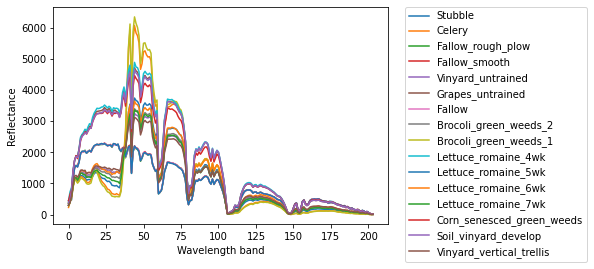

In [430]:
#3rd try
#Choose one pixel from each category
selected_pixels_random = {}
for label, pixels in selected_pixels.items():
    # Select random pixel
    pixel_random = random.choice(pixels)
    # Add pixel to dictionary
    selected_pixels_random[label] = pixel_random
#print(selected_pixels_random)
# sort dictionary
Dict = selected_pixels_random
Keys = list(Dict.keys())
Keys.sort()
sorted_dict = {i: Dict[i] for i in Keys}
print(sorted_dict)

import matplotlib.pyplot as plt

for label, pixel in selected_pixels_random.items():
    plt.plot(im[pixel, :], label=crop_type[label])

plt.xlabel('Wavelength band')
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους; 
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Από τα διαγράμματα των υπερφασματικών υπογραφών των επιλεγμένων pixel, παρατηρούμε ότι ορισμένες καλλιέργειες δε διακρίνονται πιο εύκολα από τις υπόλοιπες με βάση τη φασματική υπογραφή τους, ενώ κάποιες άλλες διακρίνονται πιο εύκολα. Παραδείγματος χάρη κάποιες καλλιέργειες, όπως η "Fallow_smooth" και η "Fallow_rough_plow", έχουν φασματική υπογραφή που μοιάζει αρκετά μεταξύ τους και μπορεί να είναι πιο δύσκολο να διακριθούν με βάση μόνο της υπογραφής. Οπότε, κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες σε σχέση με άλλες, βασιζόμενοι στην φασματική υπογραφή.

Ορισμένα κανάλια παρέχουν πιο χρήσιμες πληροφορίες για τον διαχωρισμό από κάποια άλλα, καθώς μπορεί να περιέχουν πιο ξεχωριστά χαρακτηριστικά που συνδέονται με ορισμένες καλλιέργειες, ενώ άλλα κανάλια μπορεί να περιέχουν λιγότερο ξεχωριστά χαρακτηριστικά που είναι λιγότερο χρήσιμα για τη διάκριση μεταξύ διαφορετικών καλλιεργειών.
Υπάρχει περίπτωση όλα τα κανάλια να παρέχουν κάποιες χρήσιμες πληροφορίες για τον διαχωρισμό, όμως ορισμένα κανάλια μπορεί να είναι πιο χρήσιμα από τα υπόλοιπα και εξαρτάται από τις συγκεκριμένες καλλιέργειες που αναλύονται και τα χαρακτηριστικά των φασματικών τους υπογραφών.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

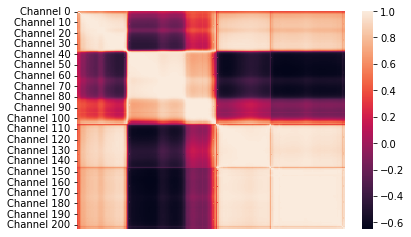

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = np.corrcoef(im, rowvar= False)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(corr_matrix, ax=ax, xticklabels=False)
ax.set_yticklabels([f'Channel {i}' for i in range(0,K,10)]) 

# Show the plot
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [432]:
from sklearn.cluster import KMeans
import numpy as np

k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(im) 

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score 

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχήσουμε τα διαφορετικά ID των cluster στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [433]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    #assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [434]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, rand_score

# Translate predicted labels
predicted_labels = translate_predicted_labels(kmeans.labels_, reshaped_labels)

# Accuracy
accuracy = accuracy_score(reshaped_labels, predicted_labels)
print("Accuracy:", accuracy)

# Rand score
rand_score = rand_score(reshaped_labels,predicted_labels)
print("Rand score:", rand_score)

# Silhouette score
silhouette_score = silhouette_score(im, y_pred)
print("Silhouette score:", silhouette_score)

map: 0 --> 7
map: 1 --> 1
map: 2 --> 8
map: 3 --> 5
map: 4 --> 4
map: 5 --> 6
map: 6 --> 9
map: 7 --> 3
map: 8 --> 2
map: 9 --> 12
map: 10 --> 13
map: 11 --> 0
map: 12 --> 10
map: 13 --> 14
map: 14 --> 11
map: 15 --> 15
Accuracy: 0.5817768663747713
Rand score: 0.9054169776881031
Silhouette score: 0.43844628061544594


 4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

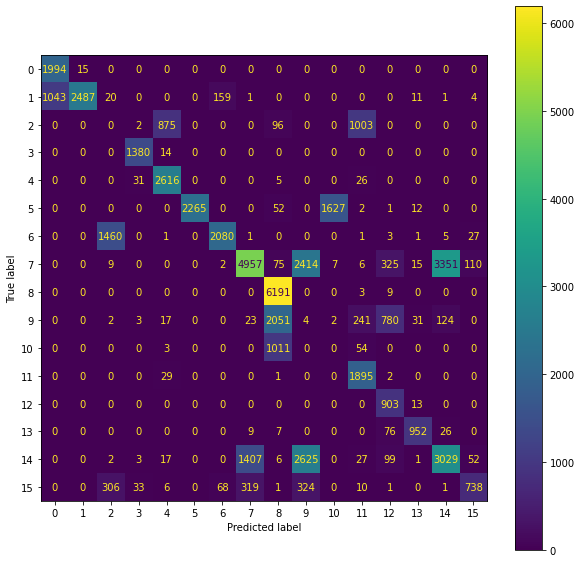

In [435]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(reshaped_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, colorbar=True)

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [436]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X2D = pca.fit_transform(im)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [437]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.75418456 0.22926902 0.01123053]
0.9946841017129436


Αυτό σημαίνει ότι το 75.42% της διακύμανσης εξηγείται με την πρώτη συνιστώσα, το 22.93% της διακύμανσης εξηγείται με την δεύτερη συνιστώσα και το 1.12% της διακύμανσης εξηγείται με την τρίτη συνιστώσα. Οπότε, το άθροισμα 99.47% εκφράζει όλη τη διακύμανση στα δεδομένα.

### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [438]:
from sklearn.cluster import KMeans
import numpy as np

k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X2D)

In [439]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, rand_score

# Translate predicted labels
predicted_labels = translate_predicted_labels(kmeans.labels_, reshaped_labels)

# Accuracy
accuracy = accuracy_score(reshaped_labels, predicted_labels)
print("Accuracy:", accuracy)

# Rand score
rand_score = rand_score(reshaped_labels,predicted_labels)
print("Rand score:", rand_score)

# Silhouette score
silhouette_score = silhouette_score(im, y_pred)
print("Silhouette score:", silhouette_score)

map: 0 --> 9
map: 1 --> 6
map: 2 --> 15
map: 3 --> 5
map: 4 --> 0
map: 5 --> 3
map: 6 --> 8
map: 7 --> 4
map: 8 --> 13
map: 9 --> 7
map: 10 --> 2
map: 11 --> 14
map: 12 --> 12
map: 13 --> 10
map: 14 --> 11
map: 15 --> 1
Accuracy: 0.6283323172421438
Rand score: 0.9110608348072841
Silhouette score: 0.4301481197518064


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε; 

map: 0 --> 10
map: 1 --> 8
map: 2 --> 14
map: 3 --> 5
map: 4 --> 0
map: 5 --> 4
map: 6 --> 11
map: 7 --> 2
map: 8 --> 6
map: 9 --> 9
map: 10 --> 7
map: 11 --> 13
map: 12 --> 1
map: 13 --> 3
map: 14 --> 12
map: 15 --> 15
map: 0 --> 2
map: 1 --> 11
map: 2 --> 1
map: 3 --> 15
map: 4 --> 9
map: 5 --> 5
map: 6 --> 3
map: 7 --> 6
map: 8 --> 8
map: 9 --> 14
map: 10 --> 4
map: 11 --> 10
map: 12 --> 12
map: 13 --> 13
map: 14 --> 7
map: 15 --> 0
map: 0 --> 7
map: 1 --> 0
map: 2 --> 9
map: 3 --> 5
map: 4 --> 2
map: 5 --> 4
map: 6 --> 13
map: 7 --> 3
map: 8 --> 14
map: 9 --> 10
map: 10 --> 8
map: 11 --> 15
map: 12 --> 11
map: 13 --> 12
map: 14 --> 6
map: 15 --> 1
map: 0 --> 4
map: 1 --> 0
map: 2 --> 15
map: 3 --> 5
map: 4 --> 2
map: 5 --> 8
map: 6 --> 7
map: 7 --> 1
map: 8 --> 3
map: 9 --> 13
map: 10 --> 14
map: 11 --> 6
map: 12 --> 12
map: 13 --> 9
map: 14 --> 11
map: 15 --> 10
map: 0 --> 7
map: 1 --> 1
map: 2 --> 9
map: 3 --> 2
map: 4 --> 4
map: 5 --> 5
map: 6 --> 12
map: 7 --> 11
map: 8 --> 3
m

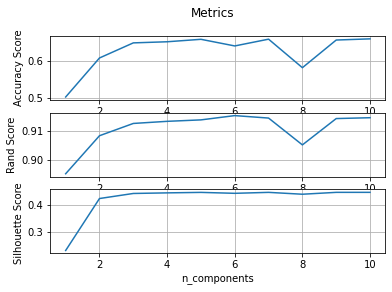

In [445]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, rand_score
import matplotlib.pyplot as plt

# Store values of the metric for each value of n_components
accuracy_scores = []
rand_scores = []
silhouette_scores = []

# for different values of n_components
for n_components in range(1, 11):
    # Create PCA with the current value of n_components
    pca = PCA(n_components=n_components)
    
    # Transform data using PCA
    X_transformed = pca.fit_transform(im)
    
    # Create a KMeans object and fit to the transformed data and get the predicted
    kmeans = KMeans(n_clusters=16)
    y_pred = kmeans.fit_predict(X_transformed)
    
    # Match the predicted labels
    matched_predicted_labels = translate_predicted_labels(kmeans.labels_, reshaped_labels)

    # Calculate the accuracy score
    acc_score = accuracy_score(reshaped_labels, matched_predicted_labels)
    accuracy_scores.append(acc_score)
    
    # Calculate the Rand score
    rand_scor = rand_score(reshaped_labels, matched_predicted_labels)
    rand_scores.append(rand_scor)
    
    # Calculate the Silhouette score
    silscore = []
    silscore = silhouette_score(im, y_pred)
    silhouette_scores.append(silscore)

# Plot the values of the metric for each value of n_components
fig, axs = plt.subplots(3)
fig.suptitle('Metrics')
axs[0].plot(range(1, 11), accuracy_scores, label='Accuracy Score')
axs[1].plot(range(1, 11), rand_scores, label='Rand Score')
axs[2].plot(range(1, 11), silhouette_scores, label='Silhouette Score')
axs[0].set_ylabel('Accuracy Score')
axs[1].set_ylabel('Rand Score')
axs[2].set_ylabel('Silhouette Score ')
plt.xlabel('n_components')
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()


H αύξηση του αριθμού των στοιχείων n-components στον μετασχηματισμό PCA, οδηγεί αρχικά σε μια ελαφρά βελτίωση και στις τρεις μετρήσεις.Οι μορφές των διαγραμμάτων για τις περιπτώσεις των Rand Score και Accurancy Score είναι παρόμοιες. H καλύτερη απόδοση επιτεύχθηκε με τιμές n-components = {9,10}, βάσει των παραπάνω γραφικών παραστάσεων.